Dataset loaded successfully!

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

--- Question 1: Binomial Probability in Insurance Claims ---
Probability of at least 4 smokers in 10 people: 0.3504


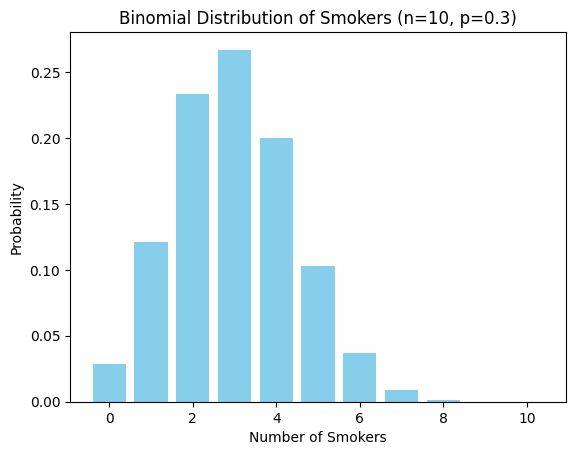


--- Question 2: Risk Estimation Using Binomial Distribution ---
Probability that exactly 5 have charges above $20,000: 0.1032
Cumulative probability that at most 5 have charges above $20,000: 0.9389


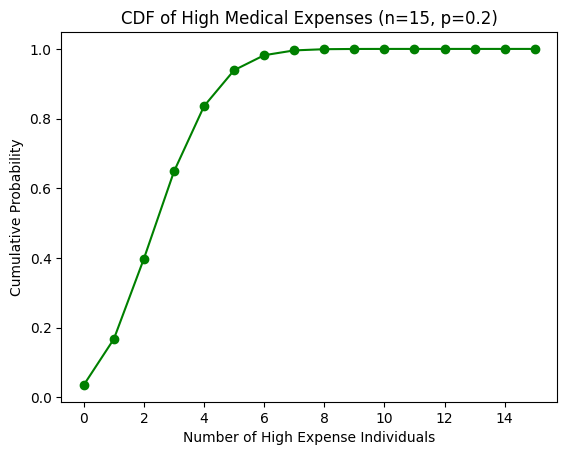


--- Question 3: Estimating Regional Smoking Rates ---


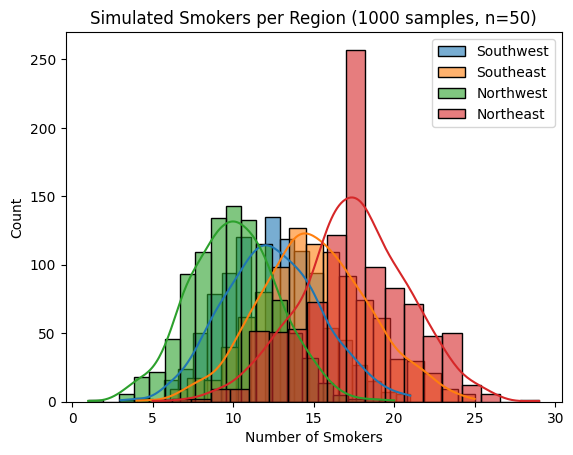

Southwest: Expected = 12.50, Simulated Mean = 12.44
Southeast: Expected = 15.00, Simulated Mean = 15.04
Northwest: Expected = 10.00, Simulated Mean = 10.02
Northeast: Expected = 17.50, Simulated Mean = 17.48

--- Question 4: Inverse Probability & Quantile Function for Insurance Risks ---
Top 10% medical charge threshold: $34831.72
Probability of selecting exactly 8 high-risk individuals: 0.005764


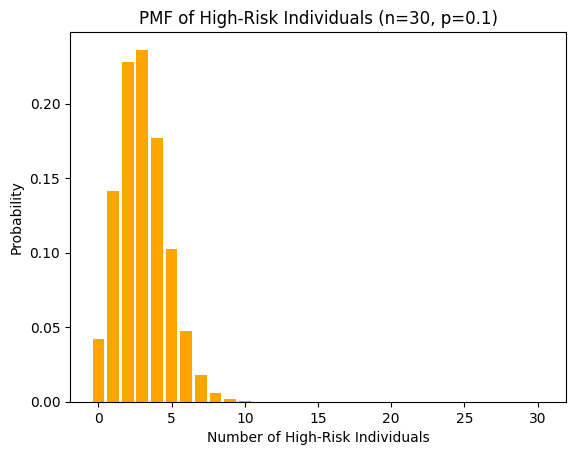


--- Question 5: Modeling the Probability of Having More than 3 Children ---
Probability that at least 5 have more than 3 children: 0.5618


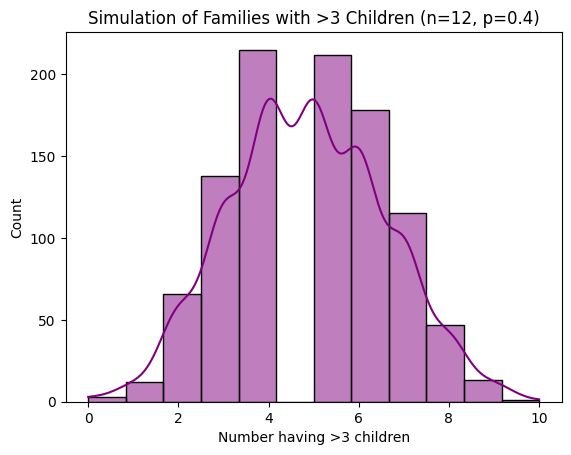

Simulated Mean: 4.85, Theoretical Mean: 4.80
Simulated Variance: 2.90, Theoretical Variance: 2.88


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/insurance.csv')
print("Dataset loaded successfully!\n")
print(df.head())

# -------------------------------------------
# Question 1: Binomial Probability in Insurance Claims
# -------------------------------------------

print("\n--- Question 1: Binomial Probability in Insurance Claims ---")

# (a) Probability that at least 4 out of 10 are smokers (p = 0.3, n = 10)
p_smoker = 0.3
n_smoker = 10

prob_at_least_4 = 1 - binom.cdf(3, n_smoker, p_smoker)
print(f"Probability of at least 4 smokers in 10 people: {prob_at_least_4:.4f}")

# (b) Plot Binomial Distribution
x = np.arange(0, n_smoker + 1)
pmf_smoker = binom.pmf(x, n_smoker, p_smoker)

plt.bar(x, pmf_smoker, color='skyblue')
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers (n=10, p=0.3)')
plt.show()


# -------------------------------------------
# Question 2: Risk Estimation Using Binomial Distribution
# -------------------------------------------

print("\n--- Question 2: Risk Estimation Using Binomial Distribution ---")

# (a) Probability that exactly 5 out of 15 have high charges (p = 0.2, n = 15)
p_high_expense = 0.2
n_expense = 15

prob_exact_5 = binom.pmf(5, n_expense, p_high_expense)
print(f"Probability that exactly 5 have charges above $20,000: {prob_exact_5:.4f}")

# (b) Cumulative probability at most 5
prob_at_most_5 = binom.cdf(5, n_expense, p_high_expense)
print(f"Cumulative probability that at most 5 have charges above $20,000: {prob_at_most_5:.4f}")

# (c) Plot CDF
cdf_expense = binom.cdf(np.arange(0, n_expense + 1), n_expense, p_high_expense)
plt.plot(np.arange(0, n_expense + 1), cdf_expense, marker='o', color='green')
plt.xlabel('Number of High Expense Individuals')
plt.ylabel('Cumulative Probability')
plt.title('CDF of High Medical Expenses (n=15, p=0.2)')
plt.show()


# -------------------------------------------
# Question 3: Estimating Regional Smoking Rates Using Binomial Approximation
# -------------------------------------------

print("\n--- Question 3: Estimating Regional Smoking Rates ---")

# (a) Simulate 1000 samples of smokers (n=50) per region
regions = {'Southwest': 0.25, 'Southeast': 0.30, 'Northwest': 0.20, 'Northeast': 0.35}
n_region = 50
simulations = {region: np.random.binomial(n_region, prob, 1000) for region, prob in regions.items()}

# (b) Visualize distributions
for region, data in simulations.items():
    sns.histplot(data, kde=True, label=region, bins=20, alpha=0.6)

plt.legend()
plt.xlabel('Number of Smokers')
plt.title('Simulated Smokers per Region (1000 samples, n=50)')
plt.show()

# (c) Expected vs Simulated Mean
for region, prob in regions.items():
    expected = n_region * prob
    simulated_mean = np.mean(simulations[region])
    print(f"{region}: Expected = {expected:.2f}, Simulated Mean = {simulated_mean:.2f}")


# -------------------------------------------
# Question 4: Inverse Probability & Quantile Function for Insurance Risks
# -------------------------------------------

print("\n--- Question 4: Inverse Probability & Quantile Function for Insurance Risks ---")

# (a) Threshold for top 10% expensive claims
threshold_90 = df['expenses'].quantile(0.9)
print(f"Top 10% medical charge threshold: ${threshold_90:.2f}")

# (b) Probability of selecting 8 high-risk individuals out of 30 (p=0.1)
p_high_risk = 0.1
n_high_risk = 30

prob_8_high_risk = binom.pmf(8, n_high_risk, p_high_risk)
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_8_high_risk:.6f}")

# (c) Plot PMF
x_risk = np.arange(0, n_high_risk + 1)
pmf_risk = binom.pmf(x_risk, n_high_risk, p_high_risk)

plt.bar(x_risk, pmf_risk, color='orange')
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.title('PMF of High-Risk Individuals (n=30, p=0.1)')
plt.show()


# -------------------------------------------
# Question 5: Modeling the Probability of Having More than 3 Children
# -------------------------------------------

print("\n--- Question 5: Modeling the Probability of Having More than 3 Children ---")

# (a) Probability that at least 5 out of 12 have more than 3 children (p=0.4)
p_children = 0.4
n_children = 12

prob_at_least_5_children = 1 - binom.cdf(4, n_children, p_children)
print(f"Probability that at least 5 have more than 3 children: {prob_at_least_5_children:.4f}")

# (b) Simulate 1000 samples and plot histogram
simulated_children = np.random.binomial(n_children, p_children, 1000)

sns.histplot(simulated_children, bins=12, kde=True, color='purple')
plt.xlabel('Number having >3 children')
plt.title('Simulation of Families with >3 Children (n=12, p=0.4)')
plt.show()

# (c) Compare mean and variance
sim_mean_children = np.mean(simulated_children)
sim_var_children = np.var(simulated_children)

theoretical_mean_children = n_children * p_children
theoretical_var_children = n_children * p_children * (1 - p_children)

print(f"Simulated Mean: {sim_mean_children:.2f}, Theoretical Mean: {theoretical_mean_children:.2f}")
print(f"Simulated Variance: {sim_var_children:.2f}, Theoretical Variance: {theoretical_var_children:.2f}")
